In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../../../data/Data_Science_Listings'

In [3]:
df = pd.read_csv(f'{DATA_DIR}/Data_Scientist_Job_Listings_Data.csv')

In [5]:
df.head()

,Unnamed: 0,source_id,original_record_id,original_job_posting_site,original_job_title,cleansed_job_title,original_company_name,original_industry,City,State,Country,original_salary,cleansed_salary_min,cleansed_salary_max,cleansed_salary_avg,original_job_type,original_work_type,original_job_description1,original_job_description2,posting_date
0,0,1,0,INDEED,Data Scientist,data scientist,Driven Brands,NaN,Benicia,California,United States,NaN,NaN,NaN,NaN,Undefined,NaN,You’ll be working alongside a team of eight an...,We invite you to join us at Driven Brands!\r\n...,11/20/2022
1,1,1,1,INDEED,Business Analyst,analyst,Sabot Consulting,NaN,NaN,NaN,United States,$80 - $120 an hour,NaN,NaN,NaN,Undefined,Remote,Preferred candidates will have prior experienc...,Sabot Consulting (Sabot) is a management consu...,11/20/2022
2,2,1,2,INDEED,IT Business Intelligence Developer (FT) Remote...,data analytics,Ballad Health,NaN,Blountville,Tennessee,United States,NaN,NaN,NaN,NaN,Undefined,Remote,Job Details Apply Save Print this job Email a…,Job Details\r\nApply\r\nSave\r\nPrint this job...,11/20/2022
3,3,1,3,INDEED,Data Engineer,data engineer,Longevity Holdings Inc.,NaN,Minneapolis-Saint Paul,Minnesota,United States,"$90,000 - $110,000 a year",90000.0,110000.0,100000.0,Undefined,Remote,Incorporate core data management competencies ...,Position: Data Engineer\r\nLocation: MN\r\nAs ...,11/20/2022
4,4,1,4,INDEED,Network Administrator/dba developer,na,WKI Kenworth,NaN,Wichita,Kansas,United States,"$50,000 - $70,000 a year",50000.0,70000.0,60000.0,Undefined,NaN,The Network Administrator provides 2nd level e...,Full Job Description\r\nThe Network Administra...,11/20/2022


In [7]:
df.shape

(19868, 20)

In [6]:
df.columns

Index(['Unnamed: 0', 'source_id', 'original_record_id',
       'original_job_posting_site', 'original_job_title', 'cleansed_job_title',
       'original_company_name', 'original_industry', 'City', 'State',
       'Country', 'original_salary', 'cleansed_salary_min',
       'cleansed_salary_max', 'cleansed_salary_avg', 'original_job_type',
       'original_work_type', 'original_job_description1',
       'original_job_description2', 'posting_date'],
      dtype='object')

In [9]:
df = df.dropna(subset=['posting_date'])
df.shape

(19868, 20)

## Availability of data points over time 

In [10]:
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%m/%d/%Y')

In [12]:
df['posting_date']

0       2022-11-20
1       2022-11-20
2       2022-11-20
3       2022-11-20
4       2022-11-20
           ...    
19863   2023-06-15
19864   2023-06-15
19865   2023-06-15
19866   2023-06-15
19867   2023-06-15
Name: posting_date, Length: 19868, dtype: datetime64[ns]

In [36]:
date_counts = df['posting_date'].value_counts().sort_index()
pd.set_option('display.max_rows', None)
date_counts

posting_date
2017-06-15     742
2019-02-06      48
2019-02-07      55
2019-02-08      70
2019-02-09      49
2019-02-10      20
2019-02-11      19
2019-02-12      52
2019-02-13      63
2019-02-14      39
2019-02-15      52
2019-02-16      46
2019-02-17      13
2019-02-18      20
2019-02-19      59
2019-02-20      54
2019-02-21      41
2019-02-22      25
2019-02-23       1
2019-02-24      25
2019-02-25      11
2019-02-26      26
2019-02-27      30
2019-02-28      26
2019-03-01      41
2019-03-02      28
2019-03-03       8
2019-03-04       3
2019-03-05      11
2019-03-06      26
2019-03-07      24
2019-03-08      21
2019-03-09      12
2019-03-10      10
2019-03-11       4
2019-03-12      24
2019-03-13      21
2019-03-14      35
2019-03-15      27
2019-03-16      29
2019-03-17       9
2019-03-18       8
2019-03-19      26
2019-03-20      22
2019-03-21      21
2019-03-22      27
2019-03-23      26
2019-03-24      10
2019-03-25       5
2019-03-26      28
2019-03-27      23
2019-03-28       8

In [37]:
pd.set_option('display.max_rows', 60)

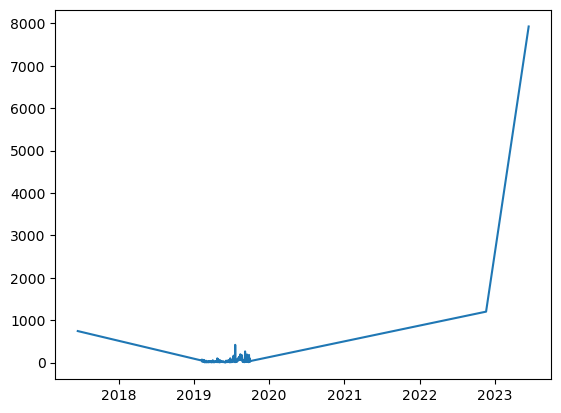

In [22]:
plt.plot(date_counts.index, date_counts.values)

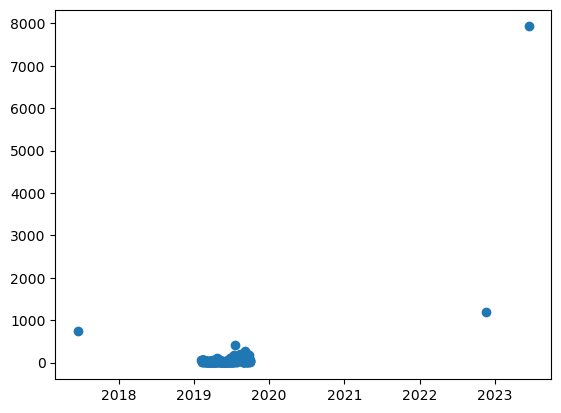

In [17]:
plt.scatter(date_counts.index, date_counts.values)

## Try reducing to year buckets

In [24]:
df['posting_year'] = df['posting_date'].dt.year

In [27]:
year_counts = df['posting_year'].value_counts().sort_index()

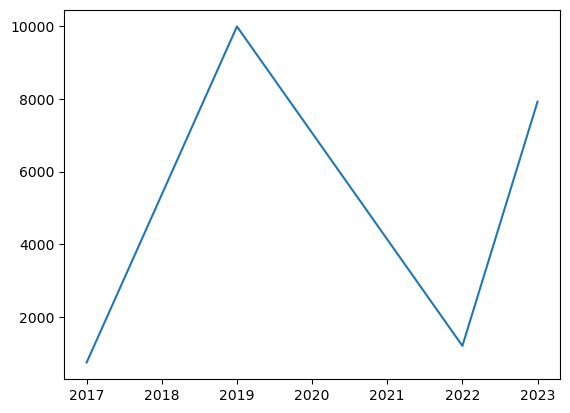

In [29]:
plt.plot(year_counts.index, year_counts.values)

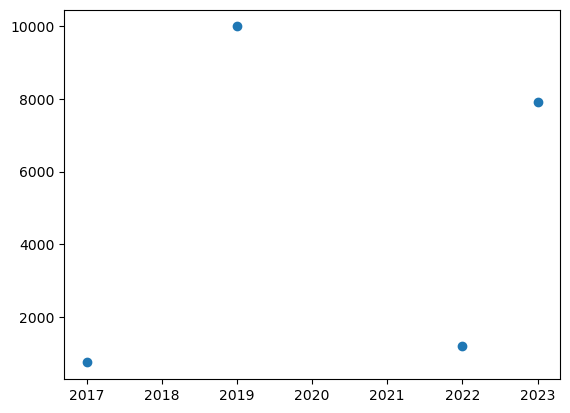

In [28]:
plt.scatter(year_counts.index, year_counts.values)

## Formalize into viz

In [48]:
set(year_counts.index)

{2017, 2019, 2022, 2023}

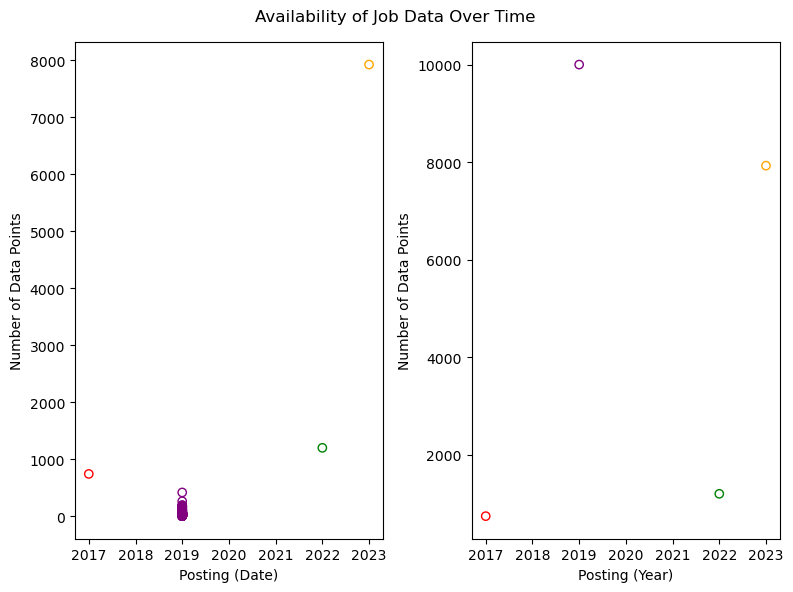

In [82]:
# Color mapping
years_colors = {
    2017: 'red',
    2019: 'purple',
    2022: 'green',
    2023: 'orange'
}

# Generate figure
fig, axs = plt.subplots(1,2, figsize=(8,6))
fig.suptitle('Availability of Job Data Over Time')
date_plot = axs[0]
year_plot = axs[1]

# Plot listings by date
date_plot.set_xlabel('Posting (Date)')
date_plot.set_ylabel('Number of Data Points')
for timestamp, count in date_counts.items():
    year = timestamp.year
    color = years_colors[year]
    date_plot.scatter(year, count, edgecolors=color, marker='o', facecolor='none')

# Plot listings by year
for year, count in year_counts.items():
    color = years_colors[year]
    year_plot.scatter(year, count, edgecolors=color, marker='o', facecolor='none')
year_plot.set_xlabel('Posting (Year)')
year_plot.set_ylabel('Number of Data Points')

fig.tight_layout()

#### Data is missing for years: 2018, 2020, 2021
#### Available for years: 2017, 2019, 2022, 2023

## Examine change in job titles over time

#### Parse data into each of the year buckets

In [104]:
df_2017 = df[df['posting_year'] == 2017].dropna(subset=['cleansed_job_title'])
df_2017 = df_2017[df_2017['cleansed_job_title'] != 'na']
df_2017.shape

(607, 21)

In [105]:
df_2019 = df[df['posting_year'] == 2019].dropna(subset=['cleansed_job_title'])
df_2019 = df_2019[df_2019['cleansed_job_title'] != 'na']
df_2019.shape

(9999, 21)

In [106]:
df_2022 = df[df['posting_year'] == 2022].dropna(subset=['cleansed_job_title'])
df_2022 = df_2022[df_2022['cleansed_job_title'] != 'na']
df_2022.shape

(1036, 21)

In [141]:
df_2023 = df[df['posting_year'] == 2023].dropna(subset=['cleansed_job_title'])
df_2023 = df_2023[df_2023['cleansed_job_title'] != 'na']
df_2023.shape

(1697, 21)

#### Get counts by job title for each bucket

In [108]:
df_2017_job_counts = df_2017['cleansed_job_title'].value_counts().sort_index()
df_2017_job_counts

cleansed_job_title
analyst                            29
data analytics                     95
data engineer                     112
data modeler                        5
data scientist                    302
data scientist project manager      1
director                           19
machine learning engineer          22
other scientist                    22
Name: count, dtype: int64

In [109]:
df_2019_job_counts = df_2019['cleansed_job_title'].value_counts().sort_index()
df_2019_job_counts

cleansed_job_title
analyst              1
data analytics      66
data engineer        8
data scientist    9845
director            79
Name: count, dtype: int64

In [110]:
df_2022_job_counts = df_2022['cleansed_job_title'].value_counts().sort_index()
df_2022_job_counts

cleansed_job_title
analyst                           157
data analytics                    187
data engineer                     187
data scientist                    164
data scientist project manager     85
director                          116
machine learning engineer         139
other scientist                     1
Name: count, dtype: int64

In [111]:
df_2023_job_counts = df_2023['cleansed_job_title'].value_counts().sort_index()
df_2023_job_counts

cleansed_job_title
analyst                           271
data analytics                    549
data engineer                     538
data modeler                       14
data scientist                    150
data scientist project manager      2
director                           27
machine learning engineer          84
other scientist                    62
Name: count, dtype: int64

#### Plot viz as stacked bar chart

In [114]:
import altair as alt

In [117]:
job_categories = set(df_2017_job_counts.index) | set(df_2019_job_counts.index) | set(df_2022_job_counts.index) | set(df_2023_job_counts.index)
job_categories

{'analyst',
 'data analytics',
 'data engineer',
 'data modeler',
 'data scientist',
 'data scientist project manager',
 'director',
 'machine learning engineer',
 'other scientist'}

In [118]:
df_2017_job_counts['data scientist']

302

In [121]:
for i, x in df_2023_job_counts.items():
    print(i)
    print(x)
    break

analyst
271


In [159]:
# Generate the stacked data
data_stacked = {
    'Posting Year': [2017, 2019, 2022, 2023]
}
for job_title in job_categories:
    data_stacked[job_title] = []
    
    for job_counts in [df_2017_job_counts, df_2019_job_counts, df_2022_job_counts, df_2023_job_counts]:
        counts = 0
        if job_title in job_counts:
            counts = job_counts[job_title]
            
        data_stacked[job_title].append(counts)
        
df_title_stacked = pd.DataFrame(data_stacked)
df_title_stacked

,Posting Year,data scientist project manager,analyst,other scientist,data modeler,director,data scientist,data engineer,machine learning engineer,data analytics
0,2017,1,29,22,5,19,302,112,22,95
1,2019,0,1,0,0,79,9845,8,0,66
2,2022,85,157,1,0,116,164,187,139,187
3,2023,2,271,62,14,27,150,538,84,549


##### Create viz

In [160]:
df_title_stacked_melted = df_title_stacked.melt('Posting Year', var_name='Job Title', value_name = 'Listing Count')
df_title_stacked_melted

,Posting Year,Job Title,Listing Count
0,2017,data scientist project manager,1
1,2019,data scientist project manager,0
2,2022,data scientist project manager,85
3,2023,data scientist project manager,2
4,2017,analyst,29
5,2019,analyst,1
6,2022,analyst,157
7,2023,analyst,271
8,2017,other scientist,22
9,2019,other scientist,0


In [162]:
stacked_bar_job_title = alt.Chart(df_title_stacked_melted).mark_bar().encode(
    x=alt.X('Posting Year:N', title='Posting Year'),
    y=alt.Y('sum(Listing Count):Q', title='Listing Count'),
    color=alt.Color('Job Title:N', title='Job Title')
).properties(
    title='Listing Count by Job Titles Over Time',
    width=600,
    height=400
)
stacked_bar_job_title

alt.Chart(...)

#### Recreate viz, using proportions instead of raw counts

In [165]:
df_title_stacked_pct_melted = df_title_stacked.set_index('Posting Year')
df_title_stacked_pct_melted = (df_title_stacked_pct_melted.div(df_title_stacked_pct_melted.sum(axis=1), axis=0) * 100).reset_index()
df_title_stacked_pct_melted = df_title_stacked_pct_melted.melt('Posting Year', var_name='Job Title', value_name='Percentage')
df_title_stacked_pct_melted

,Posting Year,Job Title,Percentage
0,2017,data scientist project manager,0.164745
1,2019,data scientist project manager,0.000000
2,2022,data scientist project manager,8.204633
3,2023,data scientist project manager,0.117855
4,2017,analyst,4.777595
5,2019,analyst,0.010001
6,2022,analyst,15.154440
7,2023,analyst,15.969358
8,2017,other scientist,3.624382
9,2019,other scientist,0.000000


In [167]:
stacked_bar_job_title_pct = alt.Chart(df_title_stacked_pct_melted).mark_bar().encode(
    x=alt.X('Posting Year:N', title='Posting Year'),
    y=alt.Y('Percentage:Q', title='Percentage of Listings (%)'),
    color=alt.Color('Job Title:N', title='Job Title')
).properties(
    title='Listing Count by Job Titles Over Time',
    width=600,
    height=400
)
stacked_bar_job_title_pct

alt.Chart(...)

In [168]:
combined_stacked_job_title_fig = stacked_bar_job_title & stacked_bar_job_title_pct
combined_stacked_job_title_fig

alt.VConcatChart(...)